In [3]:
# Beispiel 1: Numerische Integration
import numpy as np
#%pip install scipy
from scipy import integrate
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) * np.exp(-x/10)

# Bereich für die Integration
a, b = 0, 10

# Rechteckmethode
def rechteckmethode(f, a, b, n):
    dx = (b - a) / n
    summe = 0
    for i in range(n):
        xi = a + i * dx
        summe += f(xi) * dx
    return summe

# Trapezregel
def trapezregel(f, a, b, n):
    dx = (b - a) / n
    summe = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        xi = a + i * dx
        summe += f(xi)
    return summe * dx

# Simpson-Regel
def simpson_regel(f, a, b, n):
    if n % 2 != 0:
        n += 1  # n muss gerade sein
    dx = (b - a) / n
    summe = f(a) + f(b)
    
    for i in range(1, n):
        xi = a + i * dx
        if i % 2 == 0:
            summe += 2 * f(xi)
        else:
            summe += 4 * f(xi)
    
    return summe * dx / 3

# Integration mit SciPy
result, error = integrate.quad(f, a, b)
print(f"SciPy Ergebnis: {result:.6f} (Fehler: {error:.2e})")

# Vergleich der Methoden mit verschiedenen Stützstellen
n_values = [10, 50, 100, 500]
for n in n_values:
    r_result = rechteckmethode(f, a, b, n)
    t_result = trapezregel(f, a, b, n)
    s_result = simpson_regel(f, a, b, n)
    print(f"n={n}: Rechteck={r_result:.6f}, Trapez={t_result:.6f}, Simpson={s_result:.6f}")


SciPy Ergebnis: 1.315535 (Fehler: 3.43e-12)
n=10: Rechteck=1.306497, Trapez=1.206430, Simpson=1.323038
n=50: Rechteck=1.331250, Trapez=1.311237, Simpson=1.315546
n=100: Rechteck=1.324468, Trapez=1.314461, Simpson=1.315536
n=500: Rechteck=1.317494, Trapez=1.315492, Simpson=1.315535


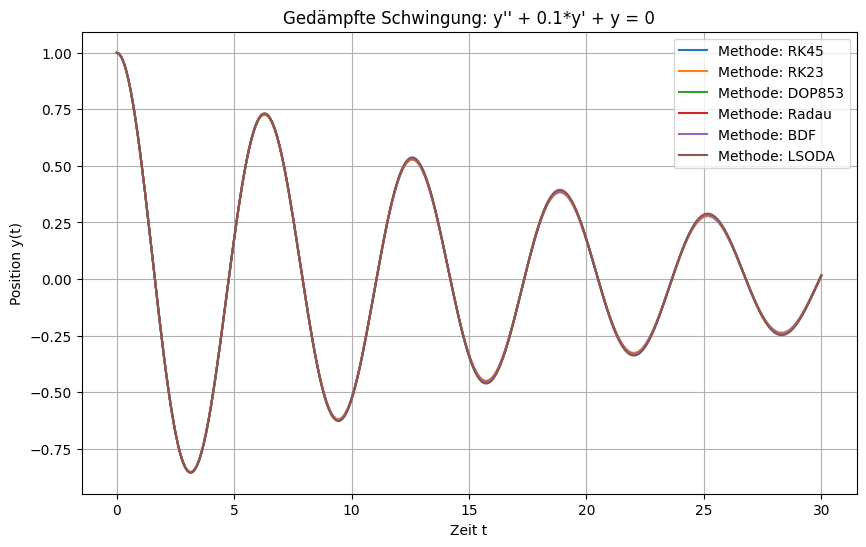

In [4]:


# Beispiel 2: Lösen einer Differentialgleichung
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Differentialgleichung: y'' + 0.1*y' + y = 0
# Als System erster Ordnung: y' = z, z' = -y - 0.1*z
def system(t, y):
    return [y[1], -y[0] - 0.1 * y[1]]

# Anfangsbedingungen: y(0) = 1, y'(0) = 0
y0 = [1, 0]
t_span = (0, 30)
t_eval = np.linspace(0, 30, 300)

# Lösung mit verschiedenen Methoden
methoden = ['RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA']
solutions = {}

for method in methoden:
    sol = solve_ivp(system, t_span, y0, method=method, t_eval=t_eval)
    solutions[method] = sol

# Visualisierung
plt.figure(figsize=(10, 6))
for method, sol in solutions.items():
    plt.plot(sol.t, sol.y[0], label=f'Methode: {method}')

plt.title('Gedämpfte Schwingung: y\'\' + 0.1*y\' + y = 0')
plt.xlabel('Zeit t')
plt.ylabel('Position y(t)')
plt.grid(True)
plt.legend()
plt.show()



/var/folders/vf/d7d1stc54w3dmyc5xs67xw0m0000gn/T/ipykernel_6144/1965184061.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['sin(x)', 'cos(x)', 'sin(x) + noise'])


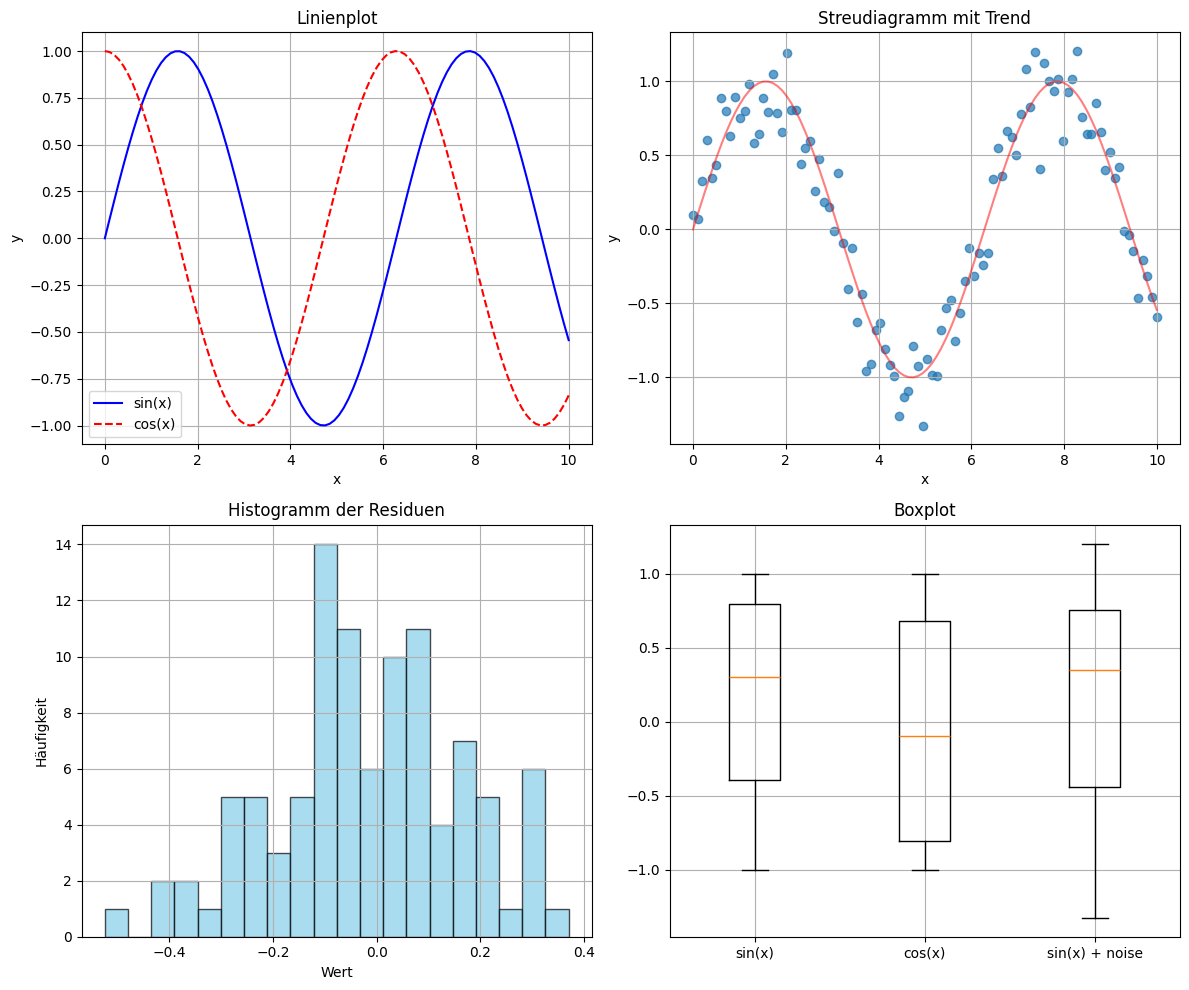

In [8]:

# Beispiel 3: Grundlegende Visualisierungen
import numpy as np
import matplotlib.pyplot as plt
#%pip install seaborn
import seaborn as sns

import pandas as pd

# Daten erzeugen
np.random.seed(42)
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
noise = np.random.normal(0, 0.2, size=len(x))
y_noisy = y1 + noise

# 1. Linienplot
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(x, y1, 'b-', label='sin(x)')
plt.plot(x, y2, 'r--', label='cos(x)')
plt.title('Linienplot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# 2. Streudiagramm
plt.subplot(2, 2, 2)
plt.scatter(x, y_noisy, alpha=0.7)
plt.plot(x, y1, 'r-', alpha=0.5)
plt.title('Streudiagramm mit Trend')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# 3. Histogramm
plt.subplot(2, 2, 3)
plt.hist(noise, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogramm der Residuen')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.grid(True)

# 4. Boxplot
plt.subplot(2, 2, 4)
data = [y1, y2, y_noisy]
plt.boxplot(data, labels=['sin(x)', 'cos(x)', 'sin(x) + noise'])
plt.title('Boxplot')
plt.grid(True)

plt.tight_layout()
plt.show()



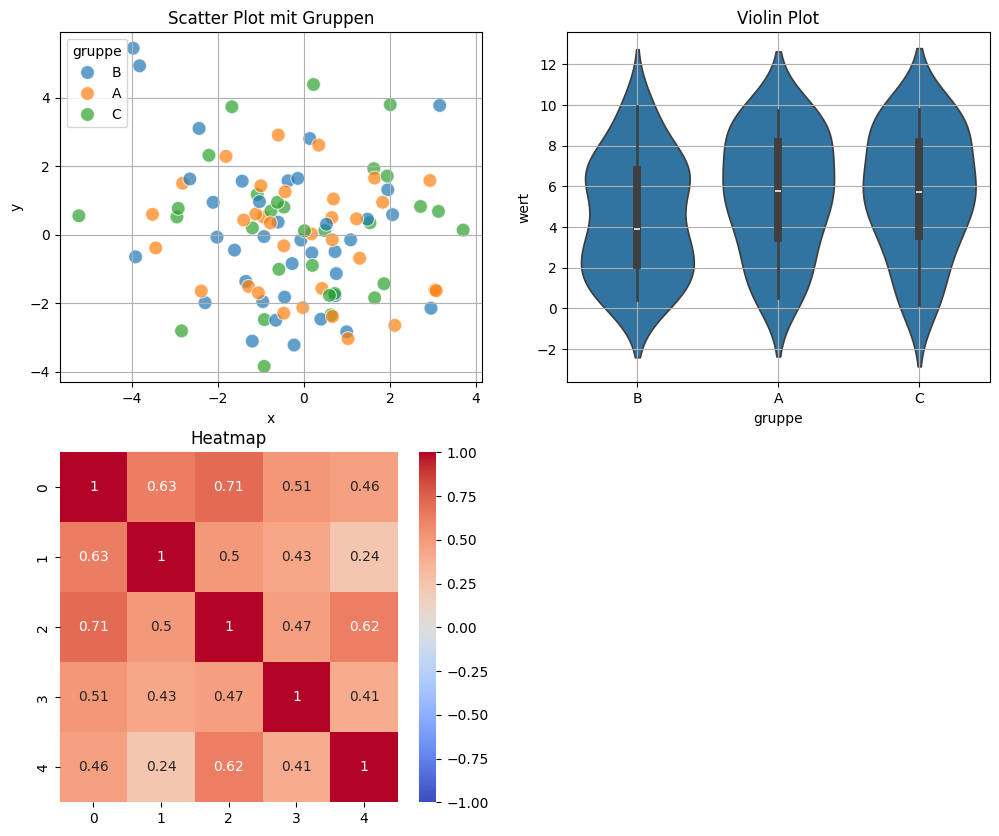

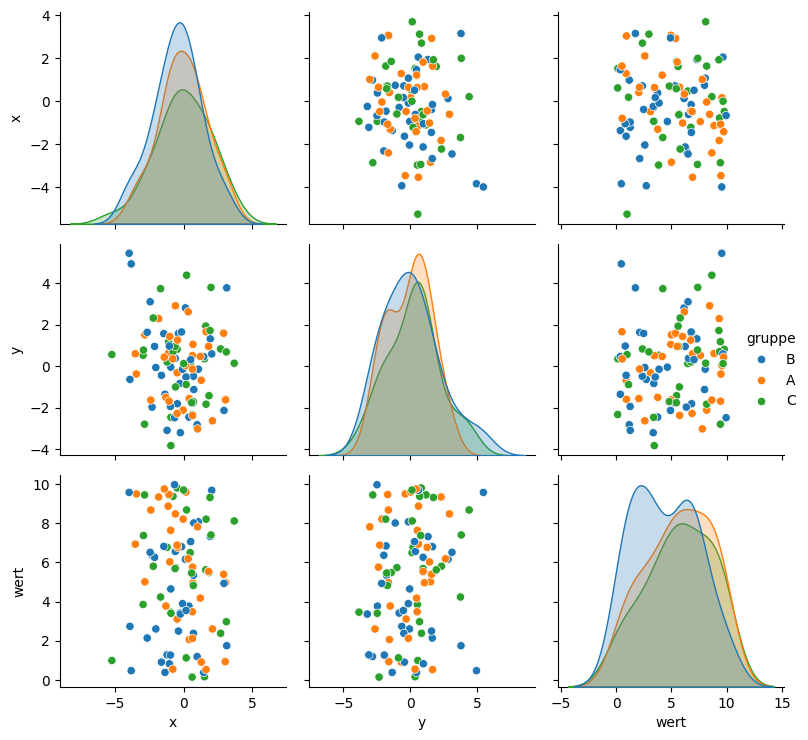

In [9]:

# Beispiel 4: Erweiterte Visualisierungen mit Seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Beispieldaten erstellen
np.random.seed(42)
n = 100
data = {
    'x': np.random.normal(0, 2, n),
    'y': np.random.normal(0, 2, n),
    'gruppe': np.random.choice(['A', 'B', 'C'], n),
    'wert': np.random.uniform(0, 10, n)
}
df = pd.DataFrame(data)

# 1. Scatter Plot mit verschiedenen Gruppen
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='x', y='y', hue='gruppe', s=100, alpha=0.7)
plt.title('Scatter Plot mit Gruppen')
plt.grid(True)

# 2. Violin Plot
plt.subplot(2, 2, 2)
sns.violinplot(data=df, x='gruppe', y='wert')
plt.title('Violin Plot')
plt.grid(True)

# 3. Heatmap
plt.subplot(2, 2, 3)
# Korrelationsmatrix erstellen
corr_data = np.random.rand(5, 5)
corr_data = 0.5 * (corr_data + corr_data.T)
np.fill_diagonal(corr_data, 1)
sns.heatmap(corr_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap')

# 4. Pairplot (in separatem Fenster)
sns.pairplot(df, hue='gruppe', height=2.5)

plt.tight_layout()
plt.show()



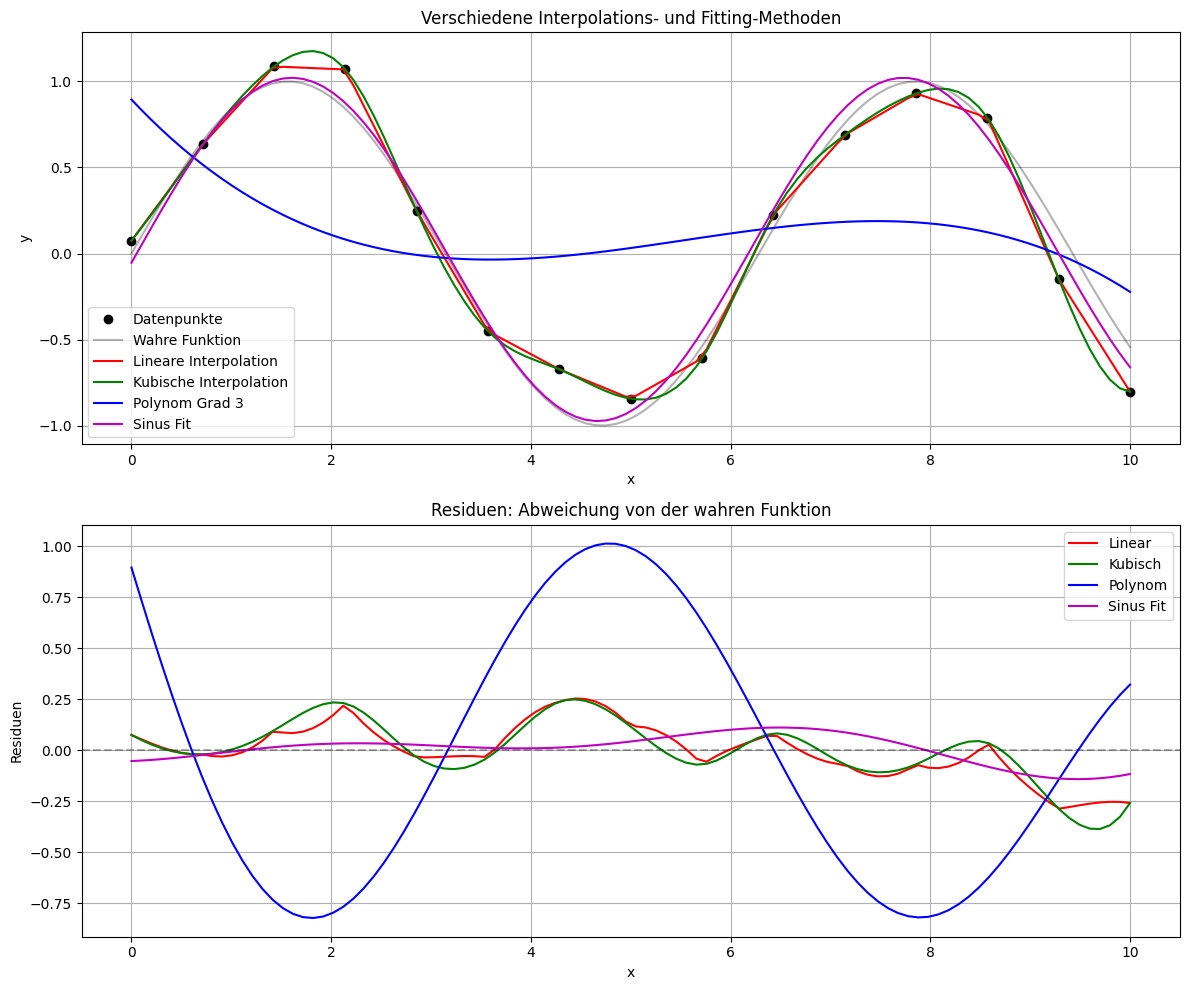

In [10]:

# Beispiel 5: Interpolation und Curve Fitting
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import curve_fit

# Datenpunkte erzeugen
np.random.seed(42)
x = np.linspace(0, 10, 15)
y_true = np.sin(x)
y = y_true + np.random.normal(0, 0.15, size=len(x))

# Feines Gitter für glatte Plots
x_fine = np.linspace(0, 10, 100)
y_true_fine = np.sin(x_fine)

# 1. Lineare Interpolation
linear_interp = interpolate.interp1d(x, y, kind='linear')
y_linear = linear_interp(x_fine)

# 2. Kubische Spline-Interpolation
cubic_interp = interpolate.interp1d(x, y, kind='cubic')
y_cubic = cubic_interp(x_fine)

# 3. Polynomiale Regression
def polynomial(x, *coeffs):
    y = np.zeros_like(x)
    for i, coeff in enumerate(coeffs):
        y += coeff * x ** i
    return y

# Polynom Grad 3
popt, pcov = curve_fit(lambda x, a, b, c, d: polynomial(x, a, b, c, d), x, y)
y_poly = polynomial(x_fine, *popt)

# 4. Nichtlineare Kurvenanpassung
def sinus_model(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

popt_sin, pcov_sin = curve_fit(sinus_model, x, y, p0=[1, 1, 0, 0])
y_sin_fit = sinus_model(x_fine, *popt_sin)

# Visualisierung
plt.figure(figsize=(12, 10))

# Plot 1: Vergleich aller Methoden
plt.subplot(2, 1, 1)
plt.plot(x, y, 'ko', label='Datenpunkte')
plt.plot(x_fine, y_true_fine, 'k-', alpha=0.3, label='Wahre Funktion')
plt.plot(x_fine, y_linear, 'r-', label='Lineare Interpolation')
plt.plot(x_fine, y_cubic, 'g-', label='Kubische Interpolation')
plt.plot(x_fine, y_poly, 'b-', label=f'Polynom Grad 3')
plt.plot(x_fine, y_sin_fit, 'm-', label='Sinus Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Verschiedene Interpolations- und Fitting-Methoden')
plt.legend()
plt.grid(True)

# Plot 2: Residuen
plt.subplot(2, 1, 2)
plt.plot(x_fine, y_linear - y_true_fine, 'r-', label='Linear')
plt.plot(x_fine, y_cubic - y_true_fine, 'g-', label='Kubisch')
plt.plot(x_fine, y_poly - y_true_fine, 'b-', label='Polynom')
plt.plot(x_fine, y_sin_fit - y_true_fine, 'm-', label='Sinus Fit')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.xlabel('x')
plt.ylabel('Residuen')
plt.title('Residuen: Abweichung von der wahren Funktion')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [11]:

# Beispiel 6: Numerische Nullstellensuche
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Funktion, deren Nullstellen wir suchen
def f(x):
    return x**3 - 5*x**2 + 3*x + 1

# Ableitung der Funktion (für Newton-Verfahren)
def df(x):
    return 3*x**2 - 10*x + 3

# 1. Bisektionsverfahren
def bisection(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError("f(a) und f(b) müssen unterschiedliche Vorzeichen haben")
    
    iterations = []
    values = []
    errors = []
    
    for i in range(max_iter):
        c = (a + b) / 2
        iterations.append(i)
        values.append(c)
        errors.append(abs(f(c)))
        
        if abs(f(c)) < tol:
            break
        
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    
    return c, iterations, values, errors

# 2. Newton-Verfahren
def newton(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    iterations = []
    values = []
    errors = []
    
    for i in range(max_iter):
        f_value = f(x)
        iterations.append(i)
        values.append(x)
        errors.append(abs(f_value))
        
        if abs(f_value) < tol:
            break
        
        x = x - f_value / df(x)
    
    return x, iterations, values, errors

# 3. Sekantenverfahren
def secant(f, x0, x1, tol=1e-6, max_iter=100):
    iterations = []
    values = [x0, x1]
    errors = [abs(f(x0)), abs(f(x1))]
    
    for i in range(2, max_iter+2):
        if abs(f(x1)) < tol:
            break
        
        x_new = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0, x1 = x1, x_new
        
        iterations.append(i)
        values.append(x1)
        errors.append(abs(f(x1)))
    
    return x1, iterations[:-1], values, errors

# 4. Nullstellensuche mit SciPy
root_scipy = optimize.newton(f, 0)

# Intervall für die Suche
a, b = -1, 4

# Anwendung der Methoden
root_bisection, iterations_bisection, values_bisection, errors_bisection = bisection(f, 0, 2)
root_newton, iterations_newton, values_newton, errors_newton = newton(f, df, 3)
root_secant, iterations_secant, values_secant, errors_secant = secant(f, 0, 2)

# Visualisierung
x = np.linspace(-1, 5, 1000)
y = f(x)

plt.figure(figsize=(12, 10))

# Plot 1: Funktion und gefundene Nullstellen
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.scatter([root_bisection, root_newton, root_secant, root_scipy], 
            [0, 0, 0, 0], 
            c=['r', 'g', 'b', 'm'], 
            s=100, 
            label=['Bisektion', 'Newton', 'Sekante', 'SciPy'])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Funktion f(x) = x³ - 5x² + 3x + 1 und gefundene Nullstellen')

# Plot 2: Konvergenzverhalten
plt.subplot(2, 1, 2)
plt.semilogy(iterations_bisection, errors_bisection, 'r.-', label='Bisektion')
plt.semilogy(iterations_newton, errors_newton, 'g.-', label='Newton')
plt.semilogy(iterations_secant, errors_secant, 'b.-', label='Sekante')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('|f(x)| (log scale)')
plt.title('Konvergenzverhalten der Nullstellensuchmethoden')
plt.legend()

plt.tight_layout()
plt.show()



ZeroDivisionError: division by zero

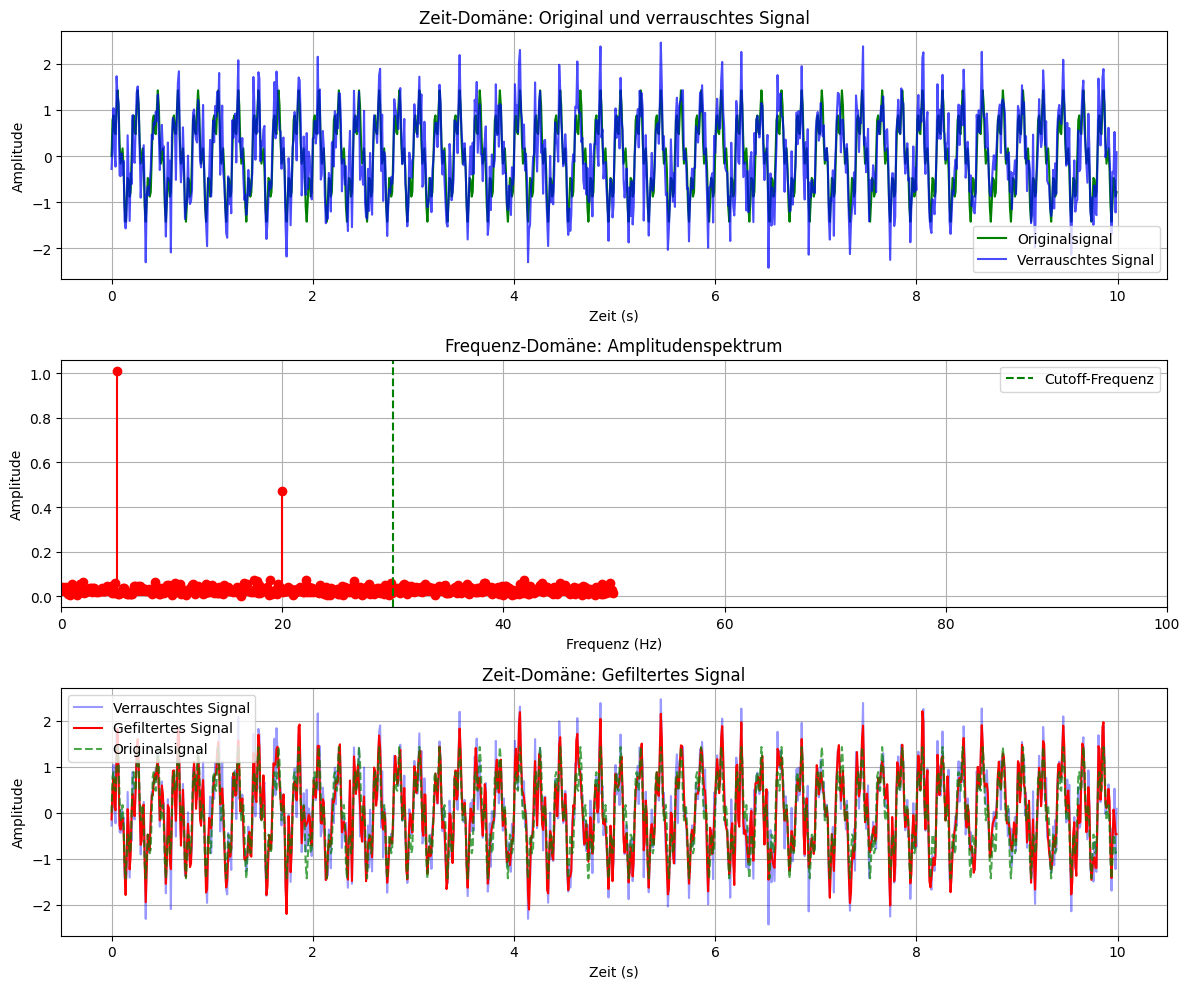

In [12]:

# Beispiel 7: Fourier-Transformation und Signalverarbeitung
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

# Signalparameter
N = 1000         # Anzahl der Datenpunkte
T = 0.01         # Abtastintervall
t = np.arange(N) * T  # Zeitvektor

# Signal generieren: Kombination aus 3 Sinus-Schwingungen mit Rauschen
f1, f2, f3 = 5, 20, 50  # Frequenzen in Hz
signal = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t) + 0.3*np.sin(2*np.pi*f3*t)
noisy_signal = signal + 0.5*np.random.randn(N)

# Fourier-Transformation durchführen
fft_result = fft(noisy_signal)
frequencies = fftfreq(N, T)  # Frequenzachse

# Positive Frequenzen auswählen (bis zur Nyquist-Frequenz)
positive_freq_indices = np.arange(1, N//2)
positive_frequencies = frequencies[positive_freq_indices]
positive_amplitudes = 2.0/N * np.abs(fft_result[positive_freq_indices])

# Einfacher Tiefpass-Filter
cutoff_freq = 30  # Hz
filter_mask = np.abs(frequencies) < cutoff_freq
filtered_fft = fft_result * filter_mask
filtered_signal = ifft(filtered_fft).real

# Visualisierung
plt.figure(figsize=(12, 10))

# Plot 1: Original- und verrauschtes Signal
plt.subplot(3, 1, 1)
plt.plot(t, signal, 'g-', label='Originalsignal')
plt.plot(t, noisy_signal, 'b-', alpha=0.7, label='Verrauschtes Signal')
plt.title('Zeit-Domäne: Original und verrauschtes Signal')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot 2: Frequenzspektrum
plt.subplot(3, 1, 2)
plt.stem(positive_frequencies, positive_amplitudes, 'r', markerfmt='ro', basefmt=' ')
plt.axvline(x=cutoff_freq, color='g', linestyle='--', label='Cutoff-Frequenz')
plt.title('Frequenz-Domäne: Amplitudenspektrum')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.xlim(0, 100)

# Plot 3: Gefiltertes Signal
plt.subplot(3, 1, 3)
plt.plot(t, noisy_signal, 'b-', alpha=0.4, label='Verrauschtes Signal')
plt.plot(t, filtered_signal, 'r-', label='Gefiltertes Signal')
plt.plot(t, signal, 'g--', alpha=0.7, label='Originalsignal')
plt.title('Zeit-Domäne: Gefiltertes Signal')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



n = 100: π ≈ 3.120000 (Fehler: 0.021593)
n = 1000: π ≈ 3.200000 (Fehler: 0.058407)
n = 10000: π ≈ 3.142800 (Fehler: 0.001207)
n = 100000: π ≈ 3.141880 (Fehler: 0.000287)


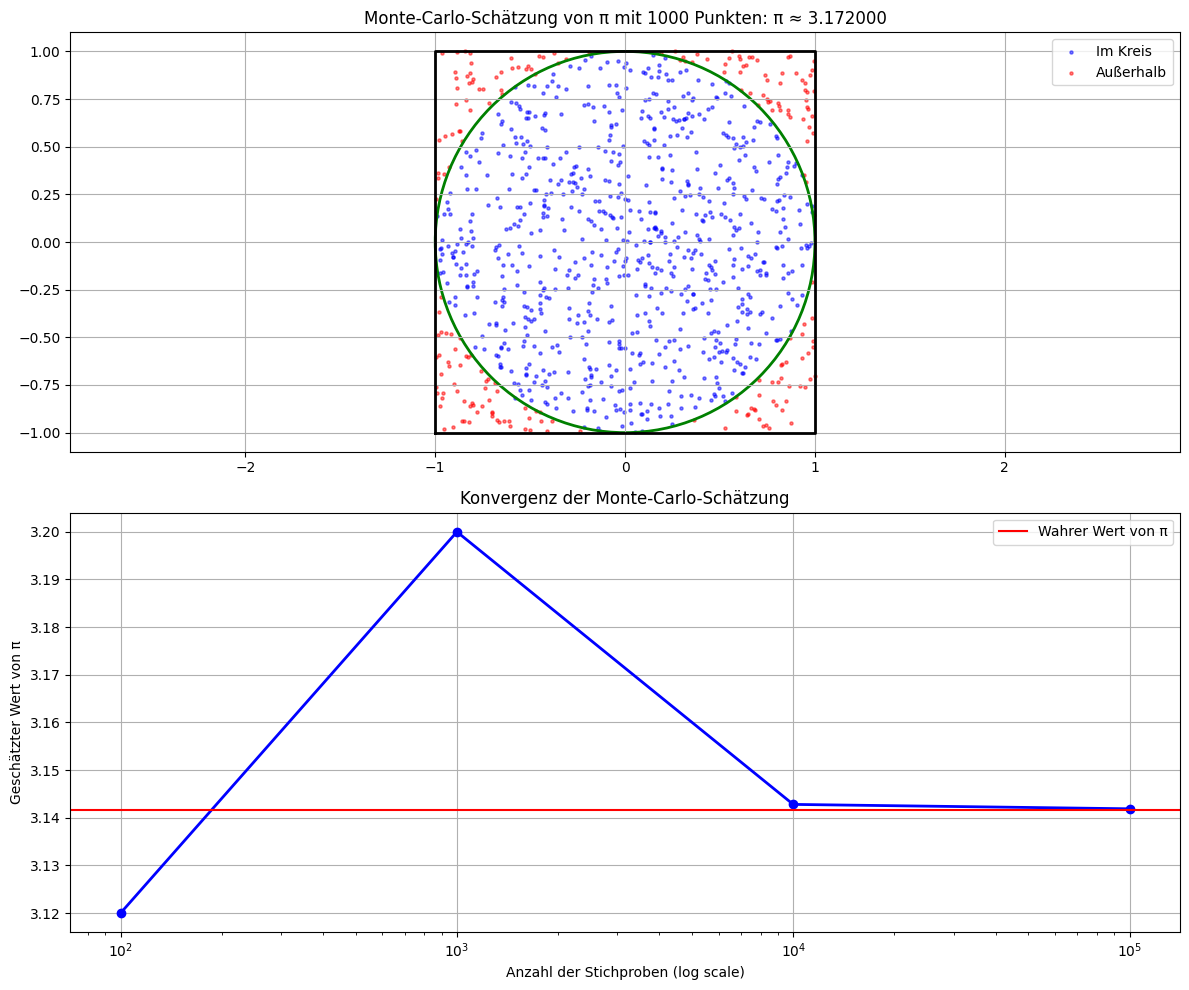

In [13]:

# Beispiel 8: Monte-Carlo-Simulation zur Schätzung von π
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Funktion zur Schätzung von π mit der Monte-Carlo-Methode
def estimate_pi(n_samples):
    # Zufällige Punkte im Einheitsquadrat erzeugen
    x = np.random.uniform(-1, 1, n_samples)
    y = np.random.uniform(-1, 1, n_samples)
    
    # Abstand vom Ursprung berechnen
    distance = np.sqrt(x**2 + y**2)
    
    # Punkte im Einheitskreis zählen
    inside_circle = distance <= 1
    
    # π schätzen: (Punkte im Kreis) / (Alle Punkte) * 4
    pi_estimate = 4 * np.sum(inside_circle) / n_samples
    
    return pi_estimate, x, y, inside_circle

# Schätzung für verschiedene Stichprobengrößen
sample_sizes = [100, 1000, 10000, 100000]
pi_estimates = []

for n in sample_sizes:
    estimate, _, _, _ = estimate_pi(n)
    pi_estimates.append(estimate)
    print(f"n = {n}: π ≈ {estimate:.6f} (Fehler: {abs(estimate - np.pi):.6f})")

# Visualisierung für n=1000
n_vis = 1000
pi_estimate, x, y, inside_circle = estimate_pi(n_vis)

plt.figure(figsize=(12, 10))

# Plot 1: Monte-Carlo-Simulation
plt.subplot(2, 1, 1)
plt.scatter(x[inside_circle], y[inside_circle], c='b', s=5, alpha=0.5, label='Im Kreis')
plt.scatter(x[~inside_circle], y[~inside_circle], c='r', s=5, alpha=0.5, label='Außerhalb')

# Einheitskreis zeichnen
circle = Circle((0, 0), 1, fill=False, color='g', linestyle='-', linewidth=2)
plt.gca().add_patch(circle)

# Einheitsquadrat zeichnen
plt.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], 'k-', linewidth=2)

plt.axis('equal')
plt.grid(True)
plt.title(f'Monte-Carlo-Schätzung von π mit {n_vis} Punkten: π ≈ {pi_estimate:.6f}')
plt.legend()

# Plot 2: Konvergenz der Schätzung
plt.subplot(2, 1, 2)
plt.semilogx(sample_sizes, pi_estimates, 'bo-', linewidth=2)
plt.axhline(y=np.pi, color='r', linestyle='-', label='Wahrer Wert von π')
plt.xlabel('Anzahl der Stichproben (log scale)')
plt.ylabel('Geschätzter Wert von π')
plt.title('Konvergenz der Monte-Carlo-Schätzung')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()